## Compute pi using various integral approximations.

We compute $\pi$ using various standard integral approximations.  $\pi$ is the area of a unit-radius circle.  
It is also half the circumference of the same circle.  This gives us two integral expressions for $\pi$. 

The equation of the unit circle is $$x^2 + y^2 = 1$$
solving for $y$ gives
$$ y = \pm \sqrt{1-x^2}$$
So the area of the unit circle is the area under $y=\sqrt{1-x^2}$ plus the area between the $x$-axis and $y=-\sqrt{1-x^2}$.  These both have the same integral expression, giving:
$$\pi = 2 \int_{-1}^1 \sqrt{1-x^2} dx$$

Similarly, given a curve in the plane $(x(t), y(t))$ the *arc-length* of the curve is given by the integral
$$ \int_a^b \sqrt{ \left(\frac{dx}{dt}\right)^2 + \left(\frac{dy}{dt}\right)^2 } dt$$
where $a$ and $b$ are the endpoints of the interval where your curve is defined.  If we let $x=t$ and $y=\sqrt{1-x^2}$, $[a,b] = [-1, 1]$ would parametrize the upper half of the circle, which convienently we know has length $\pi$. So $(x,y) = (x,\sqrt{1-x^2})$. This gives us the expression:

$$\pi = \int_{-1}^1 \sqrt{1 + \left(\frac{\partial \sqrt{1-x^2}}{dx} \right)^2}dx$$
$$ = \int_{-1}^1 \sqrt{\frac{1}{1-x^2}} dx$$

## Approximation of integrals

To approximate these integrals we will consider a few different methods.  **Ultimately** all appromations stem from the underlying *idea* of what integrals *mean*.  

$$\int_a^b f(x)dx = \lim_{\Delta x \to 0} \sum_{i=1}^n f(x_i^*) \Delta x$$

The above expression means we partition the interval $[a,b]$ into $n$ equal-length sub-intervals 
$$[a,b] = [x_0, x_1] \cup [x_1, x_2] \cup \cdots \cup [x_{n-1}, x_n]$$
$x_{i+1} - x_i = \Delta x$ for all $i$, $\Delta x = \frac{b-a}{n}$, $x_0 = a$ and $x_n = b$.  The
point $x_i^*$ is chosen from the $i$-th interval $x_i^* \in [x_{i-1},x_i]$.  In mathematics one says
the function $f$ is *integrable* to mean that such *Riemann sums* $\sum_{i=1}^n f(x_i^*) \Delta x$ can be made to be arbitrarily close to $\int_a^b f(x) dx$ provided one *only* chooses $n$ large enough.  Meaning it does not
matter how one chooses the $x_i^* \in [x_{i-1},x_i]$. 

The mid-point approximation to $\int_a^b f(x)dx$ is the approximation where one chooses $x_i^* = \frac{x_{i-1}+x_i}{2}$, the mid-point of the $i$-th interval. 

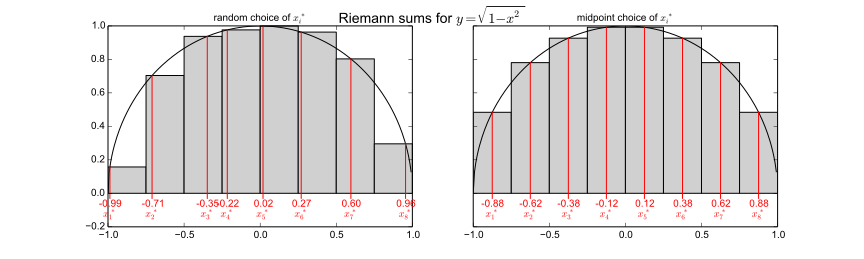

In [1]:
from IPython.display import SVG, display
display(SVG(filename='riemann.sum.eg.svg'))
## see below for the code that generated this image

In [2]:
## code to generate the mid-point approximation
from math import *
import numpy as np
import sympy as sp

## Returns the midpoint Riemann sum. 
## Use k subintervals of the interval I, to integrate the function f. 
def midpt_integral(f, I, k): 
    sum = 0.0
    deltax = (I[1]-I[0])/float(k)
    for i in range (0, k): ## x is mid-point of i-th interval. 
        x = ((i/float(k))*I[1]) + ((1.0-(i/float(k)))*I[0]) + deltax/2
        sum += f(x)*deltax
    return sum

## upper half of unit circle x^2+y^2 = 1. 
def yval(x):
    return sqrt(1-x*x)

## this is the function one needs to integrate for the arc-length of the circle.
def aval(x):
    return sqrt(1/(1-x*x))

for i in range (2, 5):
    print("Area approximation of π is " + str(2*midpt_integral(yval, [-1.0, 1.0], 10*i*i))+ " using "+str(10*i*i)+" intervals.")

for i in range (2, 5):
    print("Arclength approximation "+ str(midpt_integral(aval, [-1.0, 1.0], 50*i*i))+" using "+str(50*i*i)+" intervals.")

Area approximation of π is 3.14543058868 using 40 intervals.
Area approximation of π is 3.14273195519 using 90 intervals.
Area approximation of π is 3.14207361243 using 160 intervals.
Arclength approximation 3.05606861618 using 200 intervals.
Arclength approximation 3.0845686439 using 450 intervals.
Arclength approximation 3.09882255192 using 800 intervals.


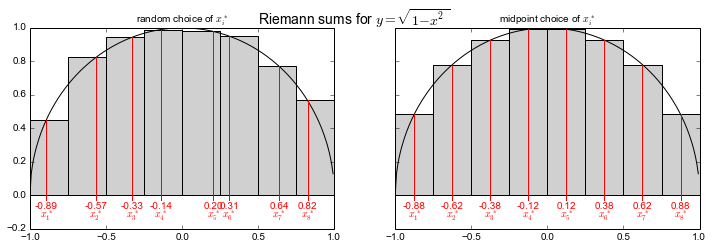

In [42]:
## Let's visualize the integral with a figure.

from matplotlib import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 
var_x = sp.Symbol('x')

## Let's revise this to a general Riemann sum plot, and one must pass the points of evaluation.
## f is the sympy expression of the function to integrate
## I is the interval one computes the Riemann sum for
## xs is a list of floating-point numbers.  The number of elements of xs is the number of intervals
##  we divide I into.  xs[i] must be a point in the i-th interval, for the purpose of plotting the
##  Riemann sum. 
def riemann_sum_plot(f, I, xs, ax, ts):
    k = len(xs)
    xax = np.arange(I[0], I[1], (I[1]-I[0])/((k*30))) ## use higher resolution on the function graph
    yax = f(xax) ## list of y-values
    ax.plot(xax,yax, color="black")## graph of the function
    delta = (I[1]-I[0])/float(k)
    for i in range(0,k): ## plots the rectangles
        ax.add_patch(patches.Rectangle( (I[0]+delta*i, 0.0), delta, f(xs[i]), facecolor="#d0d0d0") )
        ## let's also add in a line indicating the choice of xs.
        ax.plot([xs[i], xs[i]], [-0.03, f(xs[i])], 'r-')
        # need to figure out how two coordinate systems are related.  
        ax.annotate("%.2f" % (xs[i]), xy=((xs[i]-I[0])/(I[1]-I[0]), 2*ts), xycoords='axes fraction', color='red',ha="center" )
        ax.annotate("$x_{%i}^*$" %(i+1), xy=((xs[i]-I[0])/(I[1]-I[0]), ts), xycoords='axes fraction', color='red', ha="center")

yval_sympy = (1-var_x**2)**0.5
yval_numpy = sp.lambdify(var_x, yval_sympy, "numpy")

I = [-1.0, 1.0] ## interval
LEN = I[1]-I[0] ## its length
k = 8 ## partition number

fig, axarr = plt.subplots(1, 2, sharey=True)
CF = plt.gcf()
CF.set_size_inches(12,3.6)

riemann_sum_plot(yval_numpy, I, [I[0]+i*LEN/k + np.random.random()*LEN/k for i in range(k)], axarr[0], 0.05)
riemann_sum_plot(yval_numpy, I, [I[0]+i*LEN/k + 0.5*LEN/k for i in range(k)], axarr[1], 0.05)
axarr[0].set_title('random choice of $x_i^*$', fontsize=10)
axarr[1].set_title('midpoint choice of $x_i^*$', fontsize=10)
plt.suptitle('Riemann sums for $y=\sqrt{1-x^2}$', fontsize=14)

plt.savefig("riemann.sum.eg.svg")
plt.show()

#from matplotlib.backends.backend_pdf import PdfPages
#pp = PdfPages("riemann.sum.eg.pdf")
#pp.savefig(plt.gcf())
#pp.close()

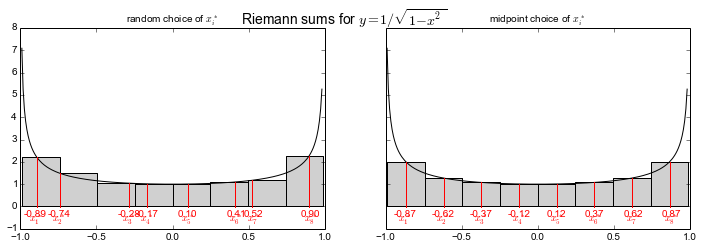

midpoint approximation: 2.71662069486 with 8 intervals.
π = 3.14159265359...


In [30]:
## Let's visualize the arc-length integral for π.

## the integrand in sympy notation
yval_sympy = (1/(1-var_x**2))**0.5
## converting into a function we can pass to midpt_integral
yval_numpy = sp.lambdify(var_x, yval_sympy, "numpy")

fig, axarr = plt.subplots(1, 2, sharey=True)
CF = plt.gcf()
CF.set_size_inches(12,3.6)

## We can't use all of [-1.0,1.0] because pyplotlib will crash trying to plot infinity...
I = [-0.99, 0.99] ## interval
LEN = I[1]-I[0] ## its length
k = 8 ## partition number

riemann_sum_plot(yval_numpy, I, [I[0]+i*LEN/k + np.random.random()*LEN/k for i in range(k)], axarr[0], 0.03)
riemann_sum_plot(yval_numpy, I, [I[0]+i*LEN/k + 0.5*LEN/k for i in range(k)], axarr[1], 0.03)
axarr[0].set_title('random choice of $x_i^*$', fontsize=10)
axarr[1].set_title('midpoint choice of $x_i^*$', fontsize=10)
plt.suptitle('Riemann sums for $y=1/\sqrt{1-x^2}$', fontsize=14)
plt.show()

print("midpoint approximation: "+str(midpt_integral(aval, [-1.0, 1.0], k))+" with "+str(k)+" intervals.")
print("π = "+str(np.pi)+"..." )

In the mid-point method iw q fairly primitive method, as it is a special case of the Riemann sum. 

A slightly more sophisticated method involves using trapezoids under the graph, rather than rectangles. 

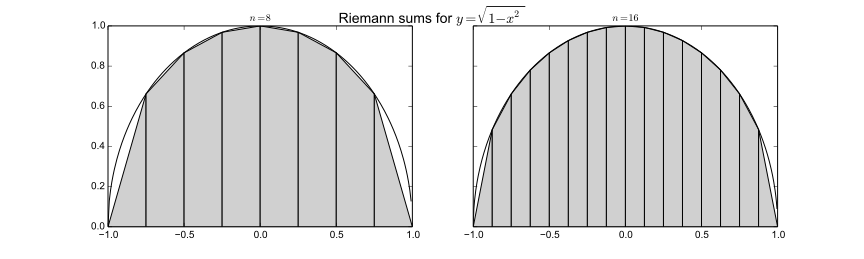

In [41]:
display(SVG(filename='trapezoidal.eg.svg'))

In [49]:
## Returns the trapezoidal approximation.
## Use k subintervals of the interval I, to integrate the function f. 
def trapezoidal_integral(f, I, k): 
    sum = 0.0
    deltax = (I[1]-I[0])/float(k)
    for i in range(k): 
        a = i*deltax + I[0]
        b = a + deltax if (a+deltax <= 1.0) else 1.0
        sum += (f(a)+f(b))*deltax/2
    return sum

for i in range (2, 5):
    print("Trapezoidal approximation of π is " + str(2*trapezoidal_integral(yval, [-1.0, 1.0], 10*i*i))+ " using "+str(10*i*i)+" intervals.")


Trapezoidal approximation of π is 3.12846487975 using 40 intervals.
Trapezoidal approximation of π is 3.13769963639 using 90 intervals.
Trapezoidal approximation of π is 3.13994979797 using 160 intervals.


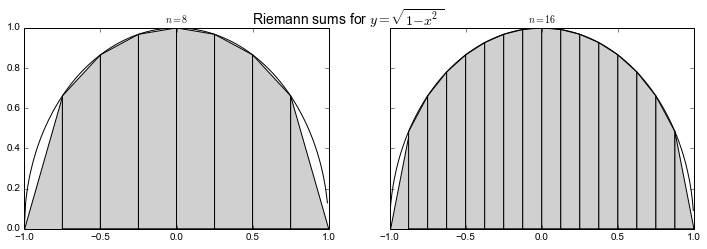

In [40]:
def trapezoidal_plot(f, I, k, ax, ts):
    ## let's plot the function, using a higher resolution than k.
    xax = np.arange(I[0], I[1], (I[1]-I[0])/((k*30))) 
    yax = f(xax) ## list of y-values
    ax.plot(xax,yax, color="black")## graph of the function
    delta = (I[1]-I[0])/float(k)
    for i in range(0,k): ## plots the rectangles
        ax.add_patch(patches.Polygon( [[I[0]+delta*i, 0.0], [I[0]+delta*(i+1), 0.0],[I[0]+delta*(i+1), f(I[0]+delta*(i+1))], [I[0]+delta*i, f(I[0]+delta*i)]],closed=True, fill=True, facecolor="#d0d0d0") )

yval_sympy = (1-var_x**2)**0.5
yval_numpy = sp.lambdify(var_x, yval_sympy, "numpy")

I = [-1.0, 1.0] ## interval
LEN = I[1]-I[0] ## its length
k = 8 ## partition number

fig, axarr = plt.subplots(1, 2, sharey=True)
CF = plt.gcf()
CF.set_size_inches(12,3.6)

trapezoidal_plot(yval_numpy, I, k, axarr[0], 0.05)
trapezoidal_plot(yval_numpy, I, 2*k, axarr[1], 0.05)
axarr[0].set_title('$n=%i$' % (k), fontsize=10)
axarr[1].set_title('$n=%i$' % (2*k), fontsize=10)
plt.suptitle('Riemann sums for $y=\sqrt{1-x^2}$', fontsize=14)

plt.savefig("trapezoidal.eg.svg")

Notice that if you write out the formula for the trapezoidal rule as a sum -- like the Riemann sums, you get a very similar formula:

$$ \left( \frac{1}{2}f(x_0) + f(x_1) + f(x_2) + f(x_3) + \cdots + f(x_{n-1}) + \frac{1}{2}f(x_n) \right) \Delta x$$

For comparison, here is a Riemann sum where we use the left endpoints, i.e. $x_i^* = x_{i-1}$. 
$$ \left( f(x_0) + f(x_1) + f(x_2) + f(x_3) + \cdots + f(x_{n-2}) + f(x_{n-1}) \right) \Delta x$$

For comparison, here is a Riemann sum where we use the left endpoints, i.e. $x_i^* = x_{i}$. 
$$ \left( f(x_1) + f(x_2) + f(x_3) + f(x_4) + \cdots + f(x_{n-1}) + f(x_{n}) \right) \Delta x$$

This has led to a bit of a *cottage industry* of approximating integrals using sums of the form
$$ \left( a_1f(x_1) + a_2f(x_2) + a_3f(x_3) + \cdots + a_nf(x_n) \right) \Delta x$$
for suitable choices of coefficients $a_i$.  For example, the trapezoidal rule is by-design the
average of the left-endpoint rule and the right-endpoint rule. 

Simpson's Rule is where one chooses the coefficients to be 
$$\left(\frac{1}{6}, \frac{4}{6}, \frac{2}{6}, \frac{4}{6}, \frac{2}{6}, \frac{4}{6}, \cdots, \frac{2}{6}, \frac{4}{6}, \frac{1}{6}\right).$$ 

This of course requires the number of subdivisions to be even.  You can think of it as averaging the midpoint rule (for $n$ subdivisions) with the trapezoidal rule (also for $n$ subdivisions).  One can also think of Simpson's rule coming from interpolating the function with a quadratic polynomial -- through three points there is a unique quadratic.  

Similarly, through four points there is a unique cubic.  This leads to something called Simpson's $3/8$-rule. The coefficients for it are:

$$\left(\frac{3}{8}, \frac{9}{8}, \frac{9}{8}, \frac{6}{8},  \frac{9}{8}, \frac{9}{8}, \frac{6}{8}, \cdots, \frac{6}{8},  \frac{9}{8}, \frac{9}{8}, \frac{3}{8}\right)$$

This rule similarly requires the number of intervals to be divisible by $3$.  One can go on and interpolate with degree $n$ polynomials, giving a similar formula, which would require the number of intervals to be divisible by $n+1$. 

We implement Simpson's $3/8$-rule below. 

In [5]:
## We compute the integrals again using Simpson's 3/8 rule, also called "Simpson's 2nd rule". 

def yval(x):
    return sqrt(1-x*x)

## Use 3k subintervals of the interval I, to integrate the function f. 
## this method requires the number of intervals to be divisible by 3. 
def threeeight_integral(f, I, k): 
    sum = 0
    deltax = (I[1]-I[0])/k
    for i in range (0, k):
        xa = ((i/float(k))*I[1]) + ((1-i/float(k))*I[0]) 
        xb = ((i/float(k))*I[1]) + ((1-i/float(k))*I[0]) + deltax/3 
        xc = ((i/float(k))*I[1]) + ((1-i/float(k))*I[0]) + (2*deltax)/3
        xd = ((i/float(k))*I[1]) + ((1-i/float(k))*I[0]) + deltax
        sum = sum + ( f(xa) + 3*f(xb) + 3*f(xc) + f(xd) )*deltax/8
    return sum

for i in range (2,6):
    print("Simpson 3/8 approximation is ", 2*threeeight_integral(yval, [-1.0,1.0], 10*i*i), " using ", 10*i*i, " intervals.")
    

('Simpson 3/8 approximation is ', 3.14038847897798, ' using ', 40, ' intervals.')
('Simpson 3/8 approximation is ', 3.1412360353090722, ' using ', 90, ' intervals.')
('Simpson 3/8 approximation is ', 3.141442231052284, ' using ', 160, ' intervals.')
('Simpson 3/8 approximation is ', 3.1415156433716693, ' using ', 250, ' intervals.')


## And now for something completely different.

There are of course *many* ways to compute $\pi$, some more specialized and efficient than others. We aim to investigate primarily techniques that have broad applicability.  One technique we will explore in more detail as the semester progresses is *probabilistic methods*.   Computers have the capacity to generate *pseudo-random numbers* which primarily means they can be generated in a manner that conforms with various standard distributions: regular, Gaussian, Poisson, etc.  This can be advantageous for computations.  We provide a rather simplistic example below. 

The square $[-1,1] \times [-1,1] = \{(x,y) \in \mathbb R^2 : -1 \leq x,y \leq 1\}$ has area $4$.  The *filled* unit circle $\{(x,y) : x^2 + y^2 \leq 1\}$ has area $\pi$.  So if we were to choose a point at random from the square, it would appear in the unit circle with likelyhood about $\frac{\pi}{4}$.  We turn this idea into an algorithm, below. 


In [6]:
## We compute pi using a probabilistic method.  Compute n points (uniformly) randomly in the box [-1,1]x[-1,1]
## using a random number generator.  Consider the number k of them that are in the unit circle.  4*k/n 
## should be close to pi provided $n$ is large. 

def randomPi( n ):
    count = 0
    for i in range(n):
        p = [2*np.random.random_sample()-1.0, 2*np.random.random_sample()-1.0]
        if p[0]*p[0] + p[1]*p[1] < 1: 
            count += 1
    return 4*count / float(n)

for i in range (16, 20):
    print("Random computation of pi using ", i*i*i, " points: ", randomPi(i*i*i))
    
    

('Random computation of pi using ', 4096, ' points: ', 3.1416015625)
('Random computation of pi using ', 4913, ' points: ', 3.1671076735192347)
('Random computation of pi using ', 5832, ' points: ', 3.098079561042524)
('Random computation of pi using ', 6859, ' points: ', 3.1450648782621373)


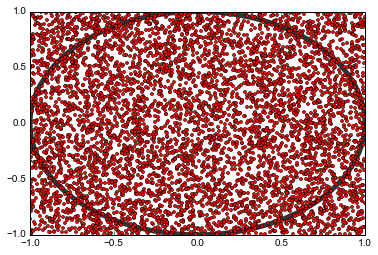

In [23]:
## Let's check to see if these points in [-1,1]x[-1,1] really appear to be evenly distributed. 
numpoints = 6000
list1 = [2.0*np.random.random()-1.0 for _ in range(numpoints)]
list2 = [2.0*np.random.random()-1.0 for _ in range(numpoints)]
ax = plt.gca() ## gca() means 'get current axis' -- this is an object one uses to append many things to plots. 
  ## gcf() is `get current figure' 

ax.add_patch(plt.Circle((0,0), 1.0, color='black', alpha=0.8, lw=5, fill=False))
plt.plot(list1, list2, 'ro', markersize=3.2, linewidth=0.2)
plt.show()